<a href="https://colab.research.google.com/github/Neerajmn28/Data-science-assignments/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [318]:
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

#Hierarchy clustering

In [237]:
data=pd.read_excel('/content/EastWestAirlines.xlsx',sheet_name='data')

In [238]:
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [239]:
data.shape

(3999, 12)

In [240]:
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


#EDA

In [241]:
data1=data.drop(['ID#'],axis=1)

In [242]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [243]:
data1.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

<Axes: >

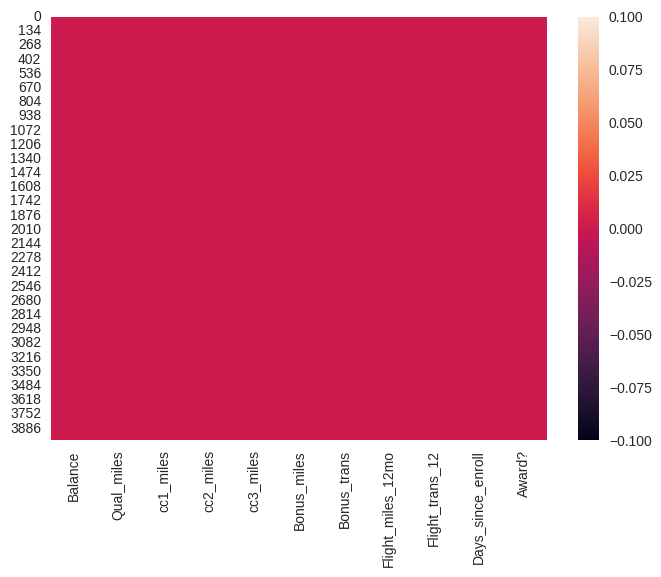

In [244]:
sns.heatmap(data1.isnull())

In [245]:
data1.duplicated().sum()

1

In [246]:
data.corr()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


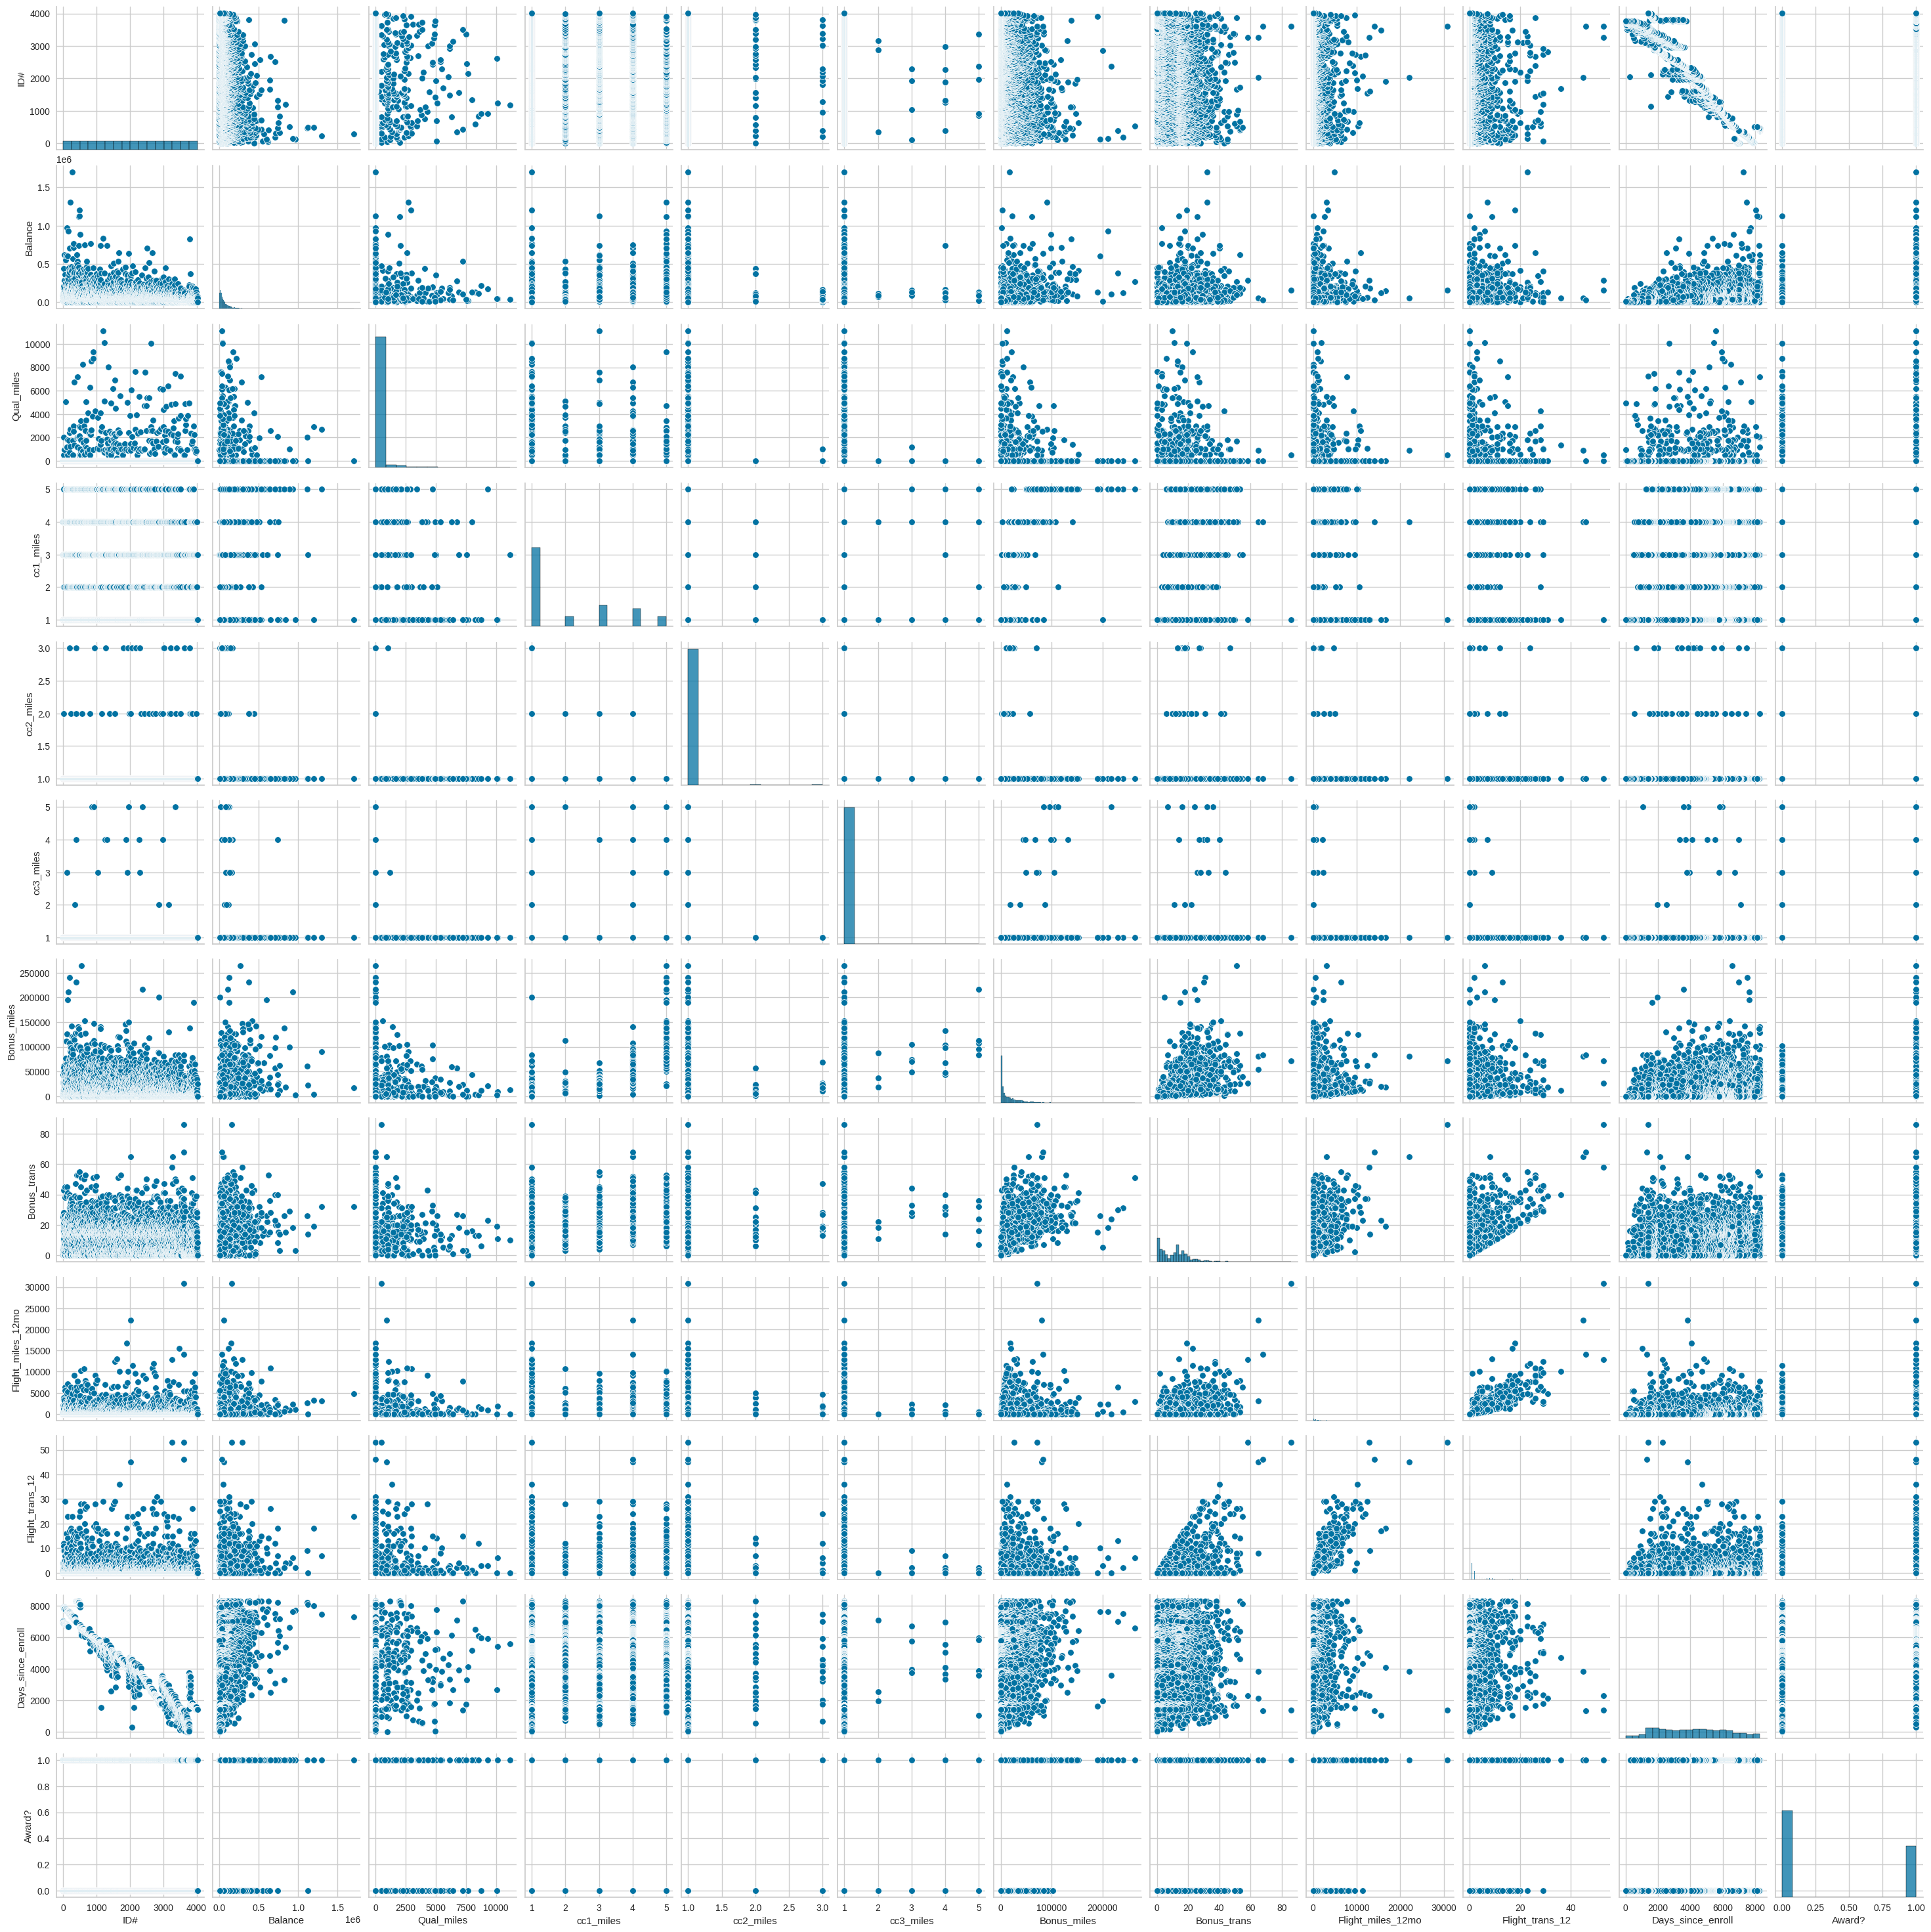

In [247]:
sns.pairplot(data)

In [248]:
data.corr()['Balance'].sort_values(ascending=False)

Balance              1.000000
Bonus_miles          0.403487
cc1_miles            0.338344
Bonus_trans          0.324935
Days_since_enroll    0.263129
Flight_trans_12      0.255700
Flight_miles_12mo    0.217551
Award?               0.178494
Qual_miles           0.108722
cc3_miles            0.035243
cc2_miles           -0.008804
ID#                 -0.243737
Name: Balance, dtype: float64

Model Building

In [249]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler1=MinMaxScaler()
scaler2=StandardScaler()

In [250]:
scaler1data=scaler1.fit_transform(data1)
scaler1data

array([[0.01650773, 0.        , 0.        , ..., 0.        , 0.84374246,
        0.        ],
       [0.01128788, 0.        , 0.        , ..., 0.        , 0.83988425,
        0.        ],
       [0.02425685, 0.        , 0.        , ..., 0.        , 0.84784181,
        0.        ],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 0.        , 0.16879672,
        1.        ],
       [0.03220189, 0.        , 0.        , ..., 0.01886792, 0.16867615,
        0.        ],
       [0.00176908, 0.        , 0.        , ..., 0.        , 0.16831444,
        0.        ]])

In [251]:
scaler2data=scaler2.fit_transform(data1)
scaler2data

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

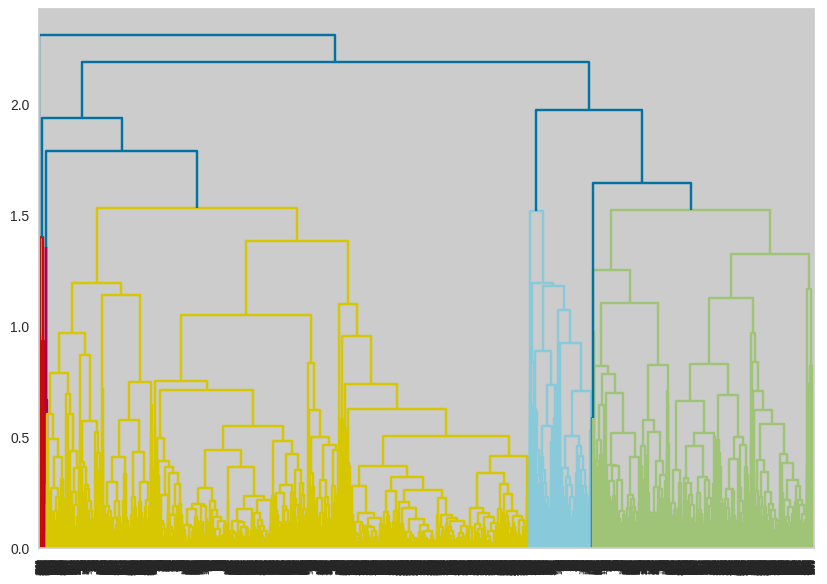

In [252]:
# Create Dendograms
plt.figure(figsize=(10,7))
dendograms=sch.dendrogram(sch.linkage(scaler1data,'complete'))

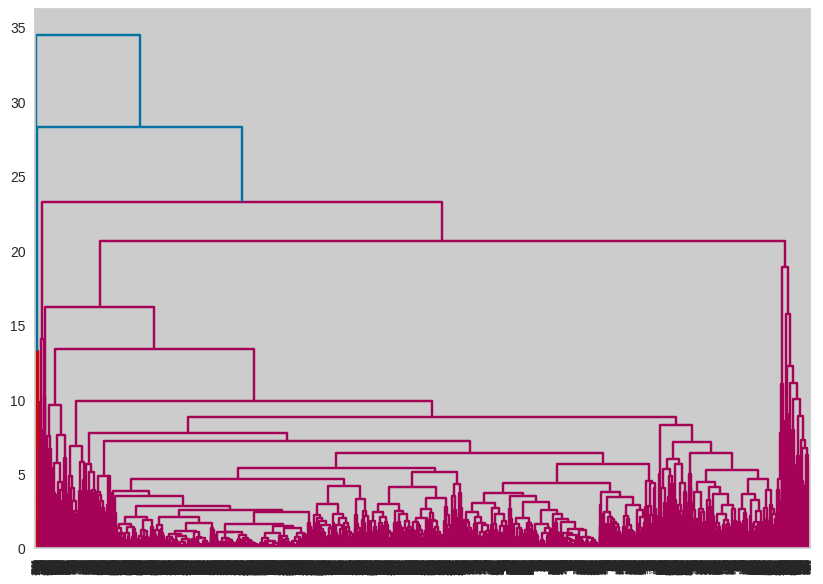

In [253]:
plt.figure(figsize=(10,7))
dendrograms=sch.dendrogram(sch.linkage(scaler2data,'complete'))

In [254]:
#Create Clusters
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
hc

AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [255]:
y=pd.DataFrame(hc.fit_predict(scaler1data),columns=['clusterid'])
y['clusterid'].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


1    1011
0     946
2     808
4     699
3     535
Name: clusterid, dtype: int64

In [256]:
# Adding clusters to dataset
# cluster id with  minmaxscaler
data['clustersid_s1']=hc.labels_
data
data1['clustersid_s1']=hc.labels_
data1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid_s1
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,4


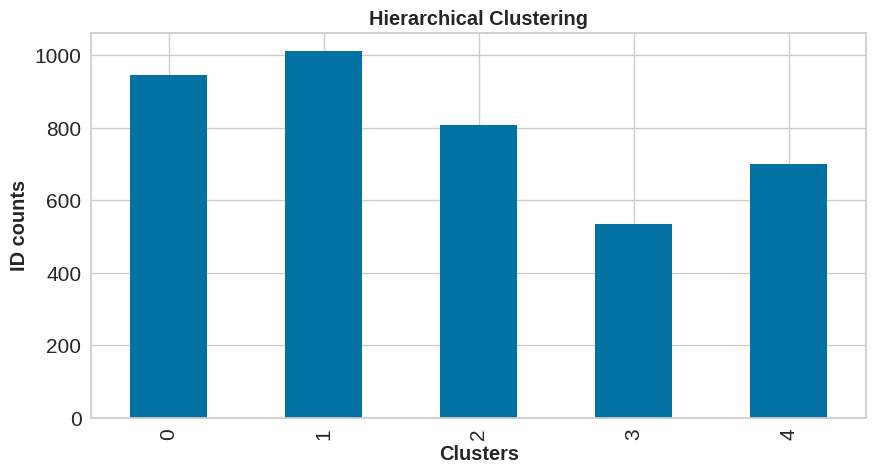

In [257]:
# Plotting barplot using groupby method to get visualization of how many rows in each cluster

fig, ax = plt.subplots(figsize=(10, 5))
data.groupby(['clustersid_s1']).count()['ID#'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [258]:
#To check how many data are in each clusters
y=pd.DataFrame(hc.fit_predict(scaler2data),columns=['clustersid'])

y['clustersid'].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


1    2446
0    1362
2     130
3      43
4      18
Name: clustersid, dtype: int64

<ipython-input-259-a639c32f684f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['clustersid_s1'])


<Axes: xlabel='clustersid_s1', ylabel='Density'>

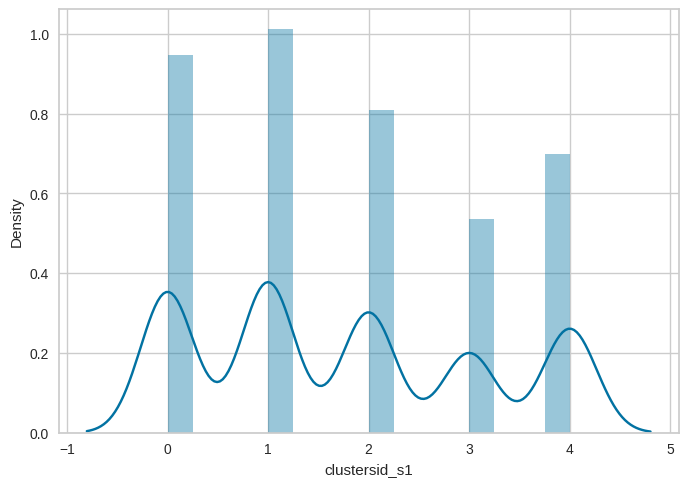

In [259]:
sns.distplot(data1['clustersid_s1'])

#K-Means clustering

In [260]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

In [261]:
data=pd.read_excel('/content/EastWestAirlines.xlsx',sheet_name='data')

In [262]:
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [263]:
data1=data.drop('ID#',axis=1)

In [264]:
scaler1=MinMaxScaler()
scaler2=StandardScaler()

In [265]:
#Normalizing the data
scaler1data = scaler1.fit_transform(data1)
scaler1data

scaler2data=scaler2.fit_transform(data1)
scaler2data

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

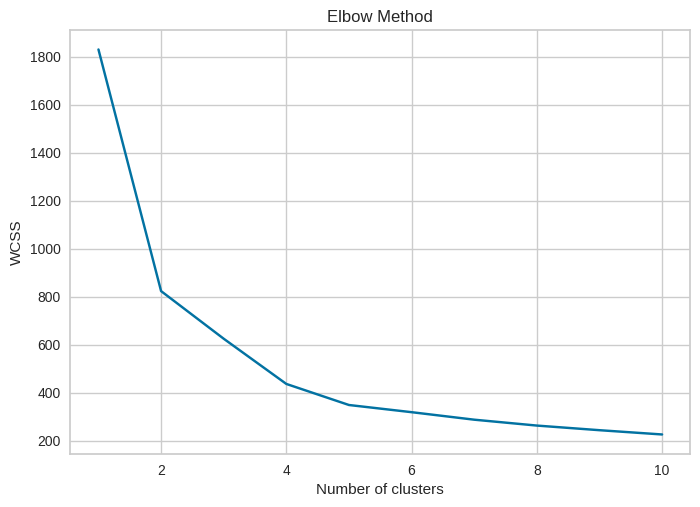

In [266]:
#Finding optimum number of cluster
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=0)
  kmeans.fit(scaler1data)
  wcss.append(kmeans.inertia_)


plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [267]:
#Build cluster algorithm
clustersnew1 = KMeans(5, random_state=26)
clustersnew1.fit(scaler1data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=26)

In [268]:
# Using data normalized by StandardScaler
clustersnew2 = KMeans(5, random_state=42)
clustersnew2.fit(scaler2data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [269]:
#Assign clusters to the data set
data['clusterid_Kmeans'] = clustersnew1.labels_
data1['clusterid_Kmeans'] = clustersnew1.labels_
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_Kmeans
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,4
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,3


In [270]:
#To count how many data in each cluster
y=pd.DataFrame(clustersnew1.fit_predict(scaler1data),columns=['clusterid_Kmeans'])
y['clusterid_Kmeans'].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3    1032
0     868
4     808
1     673
2     618
Name: clusterid_Kmeans, dtype: int64

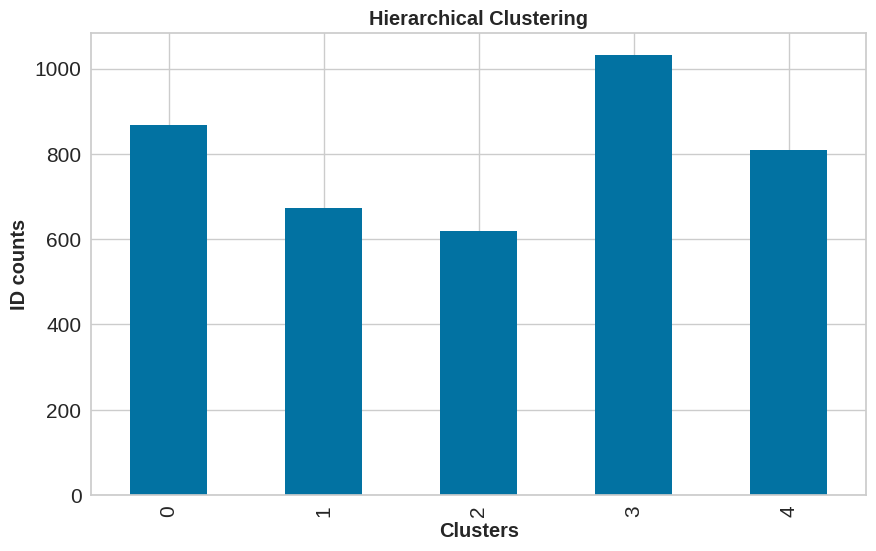

In [271]:
# Plotting barplot using groupby method to get visualization of how many row no. in each cluster
fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['clusterid_Kmeans']).count()['ID#'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

#DBSCAN

In [319]:
from sklearn.cluster import DBSCAN

In [322]:
data=pd.read_excel('/content/EastWestAirlines.xlsx',sheet_name='data')

In [323]:
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [329]:
#Standardize the data
df = data.values
sc = StandardScaler().fit(df)
x = sc.transform(df)
x

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [330]:
dbscan = DBSCAN(eps=2,min_samples=13)
dbscan.fit(x)
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [331]:
data1 = data.copy()
data1["cluster"] = dbscan.labels_
data1.groupby(data1["cluster"]).mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster,,,,,,,,,,,,
-1,1716.415162,216255.898917,1497.332130,2.631769,1.155235,1.176895,45541.025271,24.646209,3063.898917,8.844765,4731.812274,0.740072
0,2177.786508,57488.055944,32.091320,1.695187,1.000000,1.000000,9753.425339,8.864253,183.345537,0.543398,3810.395311,0.000000
1,1763.956113,73743.738245,65.469436,2.641850,1.000000,1.000000,25158.719436,13.970219,426.684953,1.344828,4581.097179,1.000000
2,2453.933333,38556.733333,0.000000,1.000000,2.000000,1.000000,8951.533333,12.933333,60.000000,0.400000,3390.400000,0.000000


In [332]:
data1["cluster"].value_counts()

 0    2431
 1    1276
-1     277
 2      15
Name: cluster, dtype: int64

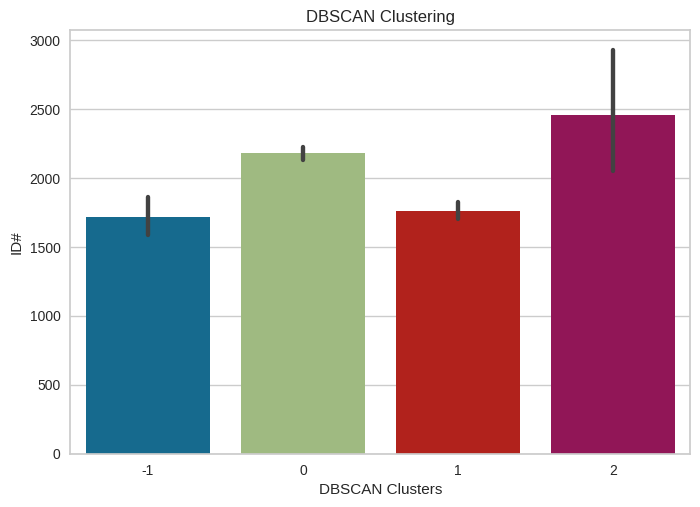

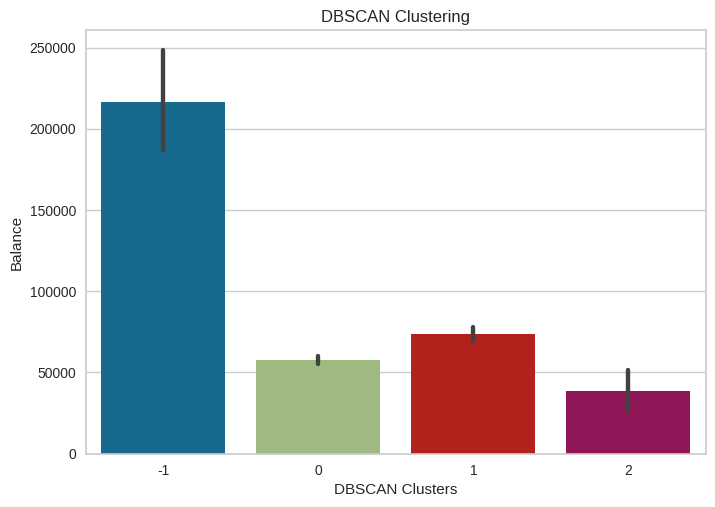

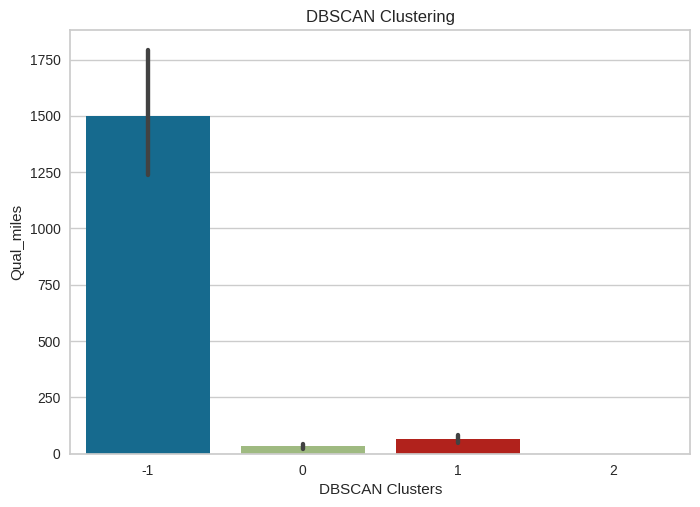

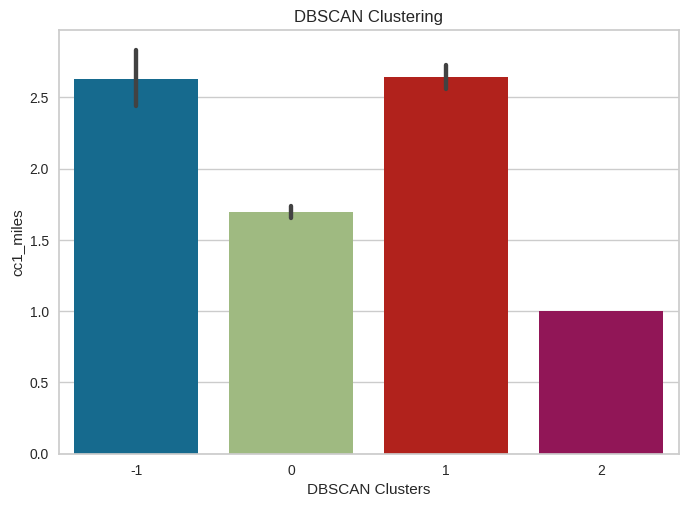

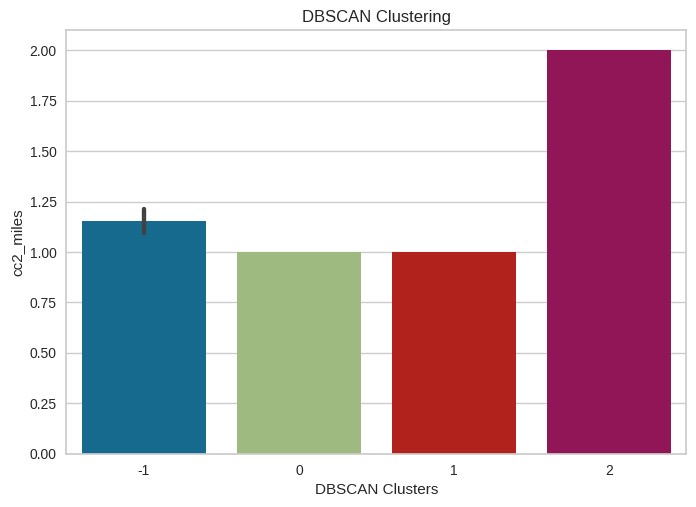

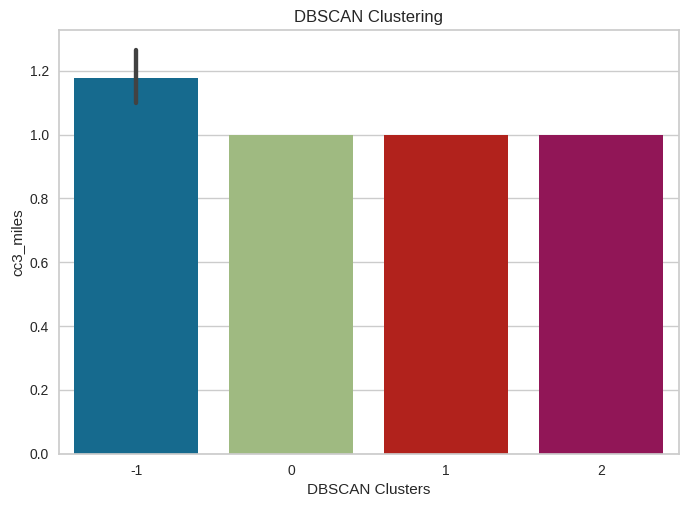

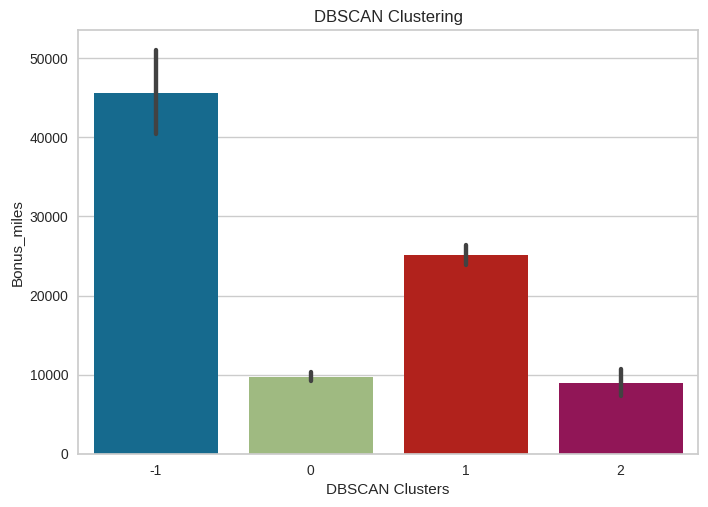

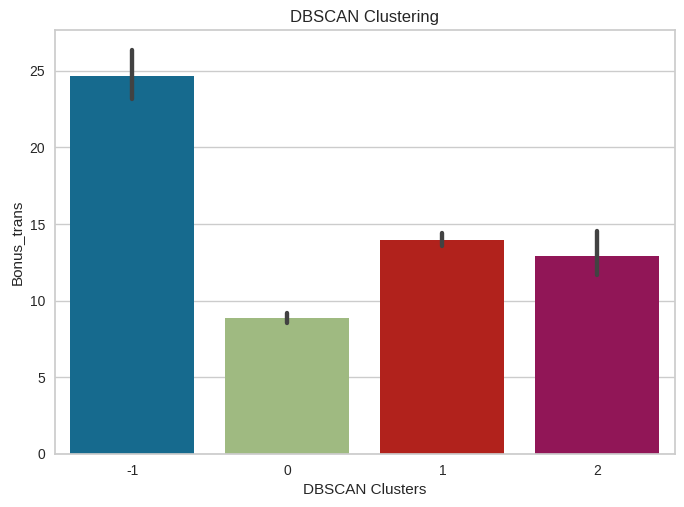

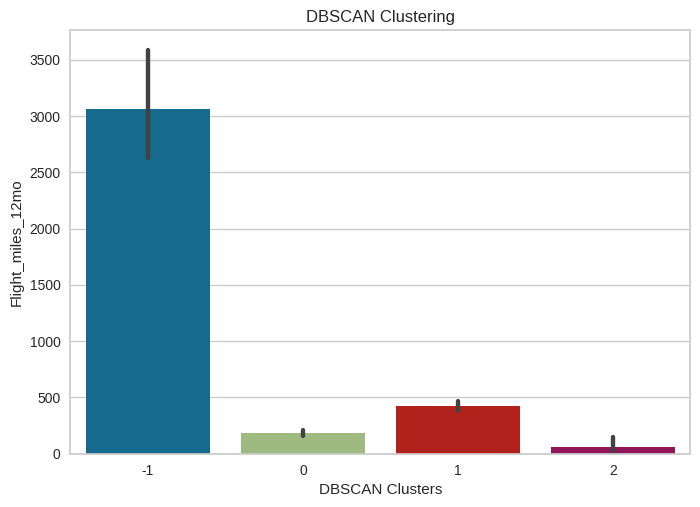

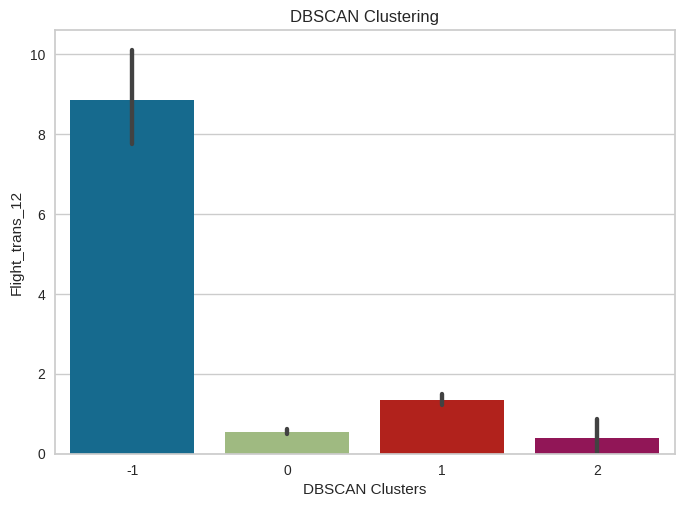

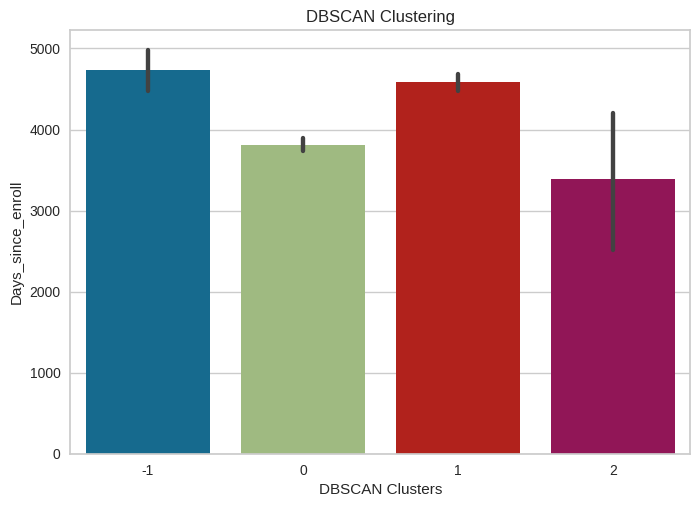

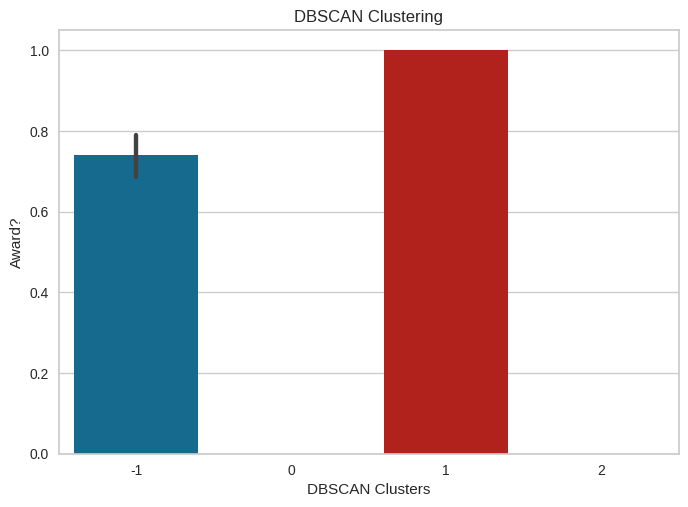

In [333]:
for i in range(0,12):
    sns.barplot(y=data1.iloc[:,i],x=data1["cluster"])
    plt.xlabel("DBSCAN Clusters")
    plt.ylabel(data1.columns[i])
    plt.title(f"DBSCAN Clustering")
    plt.show()